In [10]:

%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from copy import deepcopy
import glob, sys


[sys.path.append(f) for f in glob.glob('../utils/*')]
from preprocess import DataStruct
from plotting_utils import figSize
from lineplots import plotsd
from session_utils import *
from recalibration_utils import *

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


min_nblocks    = 3
participant    = 'T5'

FILE_DIR       = '/oak/stanford/groups/shenoy/ghwilson/nonstationarities/' + participant + '/'
fig_path       = '/home/users/ghwilson/projects/nonstationarities/figures/'
filelist       = glob.glob(FILE_DIR + 'new/*')

block_constraints = getBlockConstraints(FILE_DIR)

files = get_Sessions(filelist, min_nblocks,  block_constraints = block_constraints)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
f     = '/oak/stanford/groups/shenoy/ghwilson/nonstationarities/T5/new/t5.2021.06.07.mat'
sigma = 0

session = DataStruct(f, causal_filter= sigma, alignScreens = True)


In [161]:
train_size = 0.66
task       = None

fields = ['TX', 'cursorPos', 'targetPos']
session    = DataStruct(f, causal_filter = 2, alignScreens = True)
blocks     = None

x, y           = list(), list()
session_dat    = getTrainTest(session, train_size = train_size, task = task, blocks = [16, 17], fields = fields, returnFlattened = True)

session_dat     = getTrainTest(session, train_size = train_size, task = task, blocks = blocks, fields = fields, returnFlattened = True)
train_x, test_x = subtractMeans(session_dat['train_TX'], session_dat['test_TX'], 
                                                method = 'blockwise', concatenate = True)

train_y         = np.concatenate(session_dat['train_targetPos']) - np.concatenate(session_dat['train_cursorPos'])
test_y          = np.concatenate(session_dat['test_targetPos']) - np.concatenate(session_dat['test_cursorPos'])

print(LinearRegression().fit(train_x, train_y).score(test_x, test_y))

/share/software/user/open/py-scikit-learn/0.19.1_py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.20311801469533058


14
15
16
17


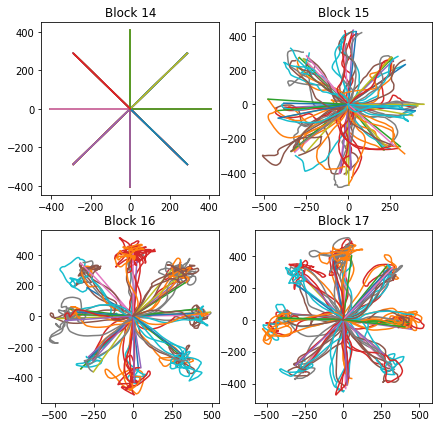

In [102]:
figSize(7, 7)

for i, block in enumerate(session.blockList):
    plt.subplot(2, 2, i + 1)
    plt.title(f'Block {block}')
    print(block)
    trl_idxs = np.where(session.blockNums == block)[0]
    for trl in trl_idxs:
        plt.plot(session.cursorPos[trl][:, 0], session.cursorPos[trl][:, 1])

plt.show()

In [116]:
mat_data = dict()
for key in vars(session):
    mat_data[key] = getattr(session, key)
    

In [120]:
scipy.io.savemat('example_session.mat', mat_data, oned_as = 'column')

/share/software/user/open/py-numpy/1.19.2_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [121]:
mat_data = scipy.io.loadmat('example_session.mat')

In [122]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'date', 'blockList', 'gameName', 'cursorPos_continuous', 'targetPos_continuous', 'decClick_continuous', 'onTarget_continuous', 'TX_continuous', 'TX_thresh', 'trialEpochs', 'interTrialPeriods', 'sysClock', 'nspClocks', 'decVel', 'n_trials', 'n_channels', 'TX', 'targetSize', 'cursorSize', 'targetPos', 'cursorPos', 'decClick', 'onTarget', 'blockNums', 'IsSuccessful', 'trialType', 'screenAligned'])

In [147]:
mat_data['trialType']


array([[array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['cursor'], dtype='<U6')],
       [array(['